# Accessing BLS API

**Part 2**

In this notebook we will learn
1. How to write a simple function that computes the inflation
2. How to retrieve several serises from the API

The following new R commands (functions) will be used:
1. ```round()```
2. ```append()```
3. ```rev()```
4. ```as.numeric()```
5. ```as.character()```
6. ```data.frame()```
7. ```factor()```
8. ```rawToChar()```

In [1]:
library(httr)
library(jsonlite)

## Inflation

We define _Inflation_ to be the change in the price level of the basket of products consumed by all urban consumers computed over a period of 12 months.

In other words it's the change in CUUR000SA0 in percent for a 12 months period.

In [2]:
base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

series = 'CUUR0000SA0'

url = paste0(base_url,series)

r = fromJSON(rawToChar(GET(url)$content))

In [3]:
r

,seriesID,data
,<chr>,<list>
1,CUUR0000SA0,"2022 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , M01 , M12 , M11 , M10 , M09 , M08 , M07 , M06 , M05 , M04 , M03 , M02 , M01 , M12 , M11 , M10 , M09 , M08 , M07 , M06 , M05 , M04 , M03 , M02 , M01 , January , December , November , October , September, August , July , June , May , April , March , February , January , December , November , October , September, August , July , June , May , April , March , February , January , true , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , 281.148 , 278.802 , 277.948 , 276.589 , 274.310 , 273.567 , 273.003 , 271.696 , 269.195 , 267.054 , 264.877 , 263.014 , 261.582 , 260.474 , 260.229 , 260.388 , 260.280 , 259.918 , 259.101 , 257.797 , 256.394 , 256.389 , 258.115 , 258.678 , 257.971"


We want to dig out a specific value from r. First, let's see what type of variable is r:

In [4]:
typeof(r)

[1] "list"

Take the relevant key/value from the dictionary:

In [5]:
r$Results

,seriesID,data
,<chr>,<list>
1,CUUR0000SA0,"2022 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , M01 , M12 , M11 , M10 , M09 , M08 , M07 , M06 , M05 , M04 , M03 , M02 , M01 , M12 , M11 , M10 , M09 , M08 , M07 , M06 , M05 , M04 , M03 , M02 , M01 , January , December , November , October , September, August , July , June , May , April , March , February , January , December , November , October , September, August , July , June , May , April , March , February , January , true , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , 281.148 , 278.802 , 277.948 , 276.589 , 274.310 , 273.567 , 273.003 , 271.696 , 269.195 , 267.054 , 264.877 , 263.014 , 261.582 , 260.474 , 260.229 , 260.388 , 260.280 , 259.918 , 259.101 , 257.797 , 256.394 , 256.389 , 258.115 , 258.678 , 257.971"


In [6]:
typeof(r$Results)

[1] "list"

In [7]:
names(r$Results)

[1] "series"

Just one key! 

In [8]:
r$Results$series

,seriesID,data
,<chr>,<list>
1,CUUR0000SA0,"2022 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , M01 , M12 , M11 , M10 , M09 , M08 , M07 , M06 , M05 , M04 , M03 , M02 , M01 , M12 , M11 , M10 , M09 , M08 , M07 , M06 , M05 , M04 , M03 , M02 , M01 , January , December , November , October , September, August , July , June , May , April , March , February , January , December , November , October , September, August , July , June , May , April , March , February , January , true , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , 281.148 , 278.802 , 277.948 , 276.589 , 274.310 , 273.567 , 273.003 , 271.696 , 269.195 , 267.054 , 264.877 , 263.014 , 261.582 , 260.474 , 260.229 , 260.388 , 260.280 , 259.918 , 259.101 , 257.797 , 256.394 , 256.389 , 258.115 , 258.678 , 257.971"


In [9]:
typeof(r$Results$series)

[1] "list"

In [10]:
nrow(r$Results$series)

[1] 1

Just one element!

In [11]:
r$Results$series[1,]

,seriesID,data
,<chr>,<list>
1,CUUR0000SA0,"2022 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2021 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , 2020 , M01 , M12 , M11 , M10 , M09 , M08 , M07 , M06 , M05 , M04 , M03 , M02 , M01 , M12 , M11 , M10 , M09 , M08 , M07 , M06 , M05 , M04 , M03 , M02 , M01 , January , December , November , October , September, August , July , June , May , April , March , February , January , December , November , October , September, August , July , June , May , April , March , February , January , true , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , NA , 281.148 , 278.802 , 277.948 , 276.589 , 274.310 , 273.567 , 273.003 , 271.696 , 269.195 , 267.054 , 264.877 , 263.014 , 261.582 , 260.474 , 260.229 , 260.388 , 260.280 , 259.918 , 259.101 , 257.797 , 256.394 , 256.389 , 258.115 , 258.678 , 257.971"


In [12]:
typeof(r$Results$series[1,])

[1] "list"

In [13]:
names(r$Results$series[1,])

[1] "seriesID" "data"

In [14]:
r$Results$series[1,]$seriesID

[1] "CUUR0000SA0"

We already know that, we need the data.

In [15]:
r$Results$series[1,]$data

,year,period,periodName,latest,value,footnotes
,<chr>,<chr>,<chr>,<chr>,<chr>,<list>
1,2022,M01,January,true,281.148,NULL
2,2021,M12,December,NA,278.802,NULL
3,2021,M11,November,NA,277.948,NULL
4,2021,M10,October,NA,276.589,NULL
5,2021,M09,September,NA,274.310,NULL
6,2021,M08,August,NA,273.567,NULL
7,2021,M07,July,NA,273.003,NULL
8,2021,M06,June,NA,271.696,NULL
9,2021,M05,May,NA,269.195,NULL


In [16]:
typeof(r$Results$series[1,]$data)

[1] "list"

It's a list of dictionaries! The first element contains the most recent month.

In [17]:
r$Results$series[1,]$data[1,]

ERROR: Error in r$Results$series[1, ]$data[1, ]: incorrect number of dimensions


Something went wrong with the dimension. Let's check the dimension first. 

In [18]:
dim(r$Results$series[1,]$data)

NULL

In [19]:
is.vector(r$Results$series[1,]$data)

[1] TRUE

It is not a data frame, but a list containing only one element, which is a data frame!

In [20]:
print(r$Results$series[1,]$data)

[[1]]
   year period periodName latest   value footnotes
1  2022    M01    January   true 281.148      NULL
2  2021    M12   December   <NA> 278.802      NULL
3  2021    M11   November   <NA> 277.948      NULL
4  2021    M10    October   <NA> 276.589      NULL
5  2021    M09  September   <NA> 274.310      NULL
6  2021    M08     August   <NA> 273.567      NULL
7  2021    M07       July   <NA> 273.003      NULL
8  2021    M06       June   <NA> 271.696      NULL
9  2021    M05        May   <NA> 269.195      NULL
10 2021    M04      April   <NA> 267.054      NULL
11 2021    M03      March   <NA> 264.877      NULL
12 2021    M02   February   <NA> 263.014      NULL
13 2021    M01    January   <NA> 261.582      NULL
14 2020    M12   December   <NA> 260.474      NULL
15 2020    M11   November   <NA> 260.229      NULL
16 2020    M10    October   <NA> 260.388      NULL
17 2020    M09  September   <NA> 260.280      NULL
18 2020    M08     August   <NA> 259.918      NULL
19 2020    M07       July

Notice that ```[[1]]```. 

If we use ```r$Results$series[1,]$data[1]``` we still get a list of a single element (the data frame) and still cannot access specific rows of the data frame.  

In [21]:
r$Results$series[1,]$data[1]

,year,period,periodName,latest,value,footnotes
,<chr>,<chr>,<chr>,<chr>,<chr>,<list>
1,2022,M01,January,true,281.148,NULL
2,2021,M12,December,NA,278.802,NULL
3,2021,M11,November,NA,277.948,NULL
4,2021,M10,October,NA,276.589,NULL
5,2021,M09,September,NA,274.310,NULL
6,2021,M08,August,NA,273.567,NULL
7,2021,M07,July,NA,273.003,NULL
8,2021,M06,June,NA,271.696,NULL
9,2021,M05,May,NA,269.195,NULL


In [22]:
dim(r$Results$series[1,]$data[1])

NULL

In [23]:
r$Results$series[1,]$data[[1]]

,year,period,periodName,latest,value,footnotes
,<chr>,<chr>,<chr>,<chr>,<chr>,<list>
1,2022,M01,January,true,281.148,NULL
2,2021,M12,December,NA,278.802,NULL
3,2021,M11,November,NA,277.948,NULL
4,2021,M10,October,NA,276.589,NULL
5,2021,M09,September,NA,274.310,NULL
6,2021,M08,August,NA,273.567,NULL
7,2021,M07,July,NA,273.003,NULL
8,2021,M06,June,NA,271.696,NULL
9,2021,M05,May,NA,269.195,NULL


In [24]:
dim(r$Results$series[1,]$data[[1]])

[1] 25  6

In [25]:
r$Results$series[1,]$data[[1]][1,]

,year,period,periodName,latest,value,footnotes
,<chr>,<chr>,<chr>,<chr>,<chr>,<list>
1,2022,M01,January,true,281.148,NULL


We can see it's the latest.

In [26]:
typeof(r$Results$series[1,]$data[[1]][1,])

[1] "list"

In [27]:
names(r$Results$series[1,]$data[[1]][1,])

[1] "year"       "period"     "periodName" "latest"     "value"     
[6] "footnotes"

We need the value:

In [28]:
r$Results$series[1,]$data[[1]][1,]$value

[1] "281.148"

In [29]:
typeof(r$Results$series[1,]$data[[1]][1,]$value)

[1] "character"

Oh no! It's a string!

In [30]:
as.numeric(r$Results$series[1,]$data[[1]][1,]$value)

[1] 281.148

Now we reached the finish line! Almost... 

What about inflation?

In [31]:
new = as.numeric(r$Results$series[1,]$data[[1]][1,]$value)    #the 1st elemnt is the latest month
old = as.numeric(r$Results$series[1,]$data[[1]][13,]$value)   #the 13th element is a year lag

inflation = (new/old - 1)*100

print(inflation)

[1] 7.479872


Can we make it look more beautiful? rounding?

In [32]:
round(inflation,1)

[1] 7.5

Nicer printing:

In [33]:
print(paste0('Inflation in the last 12 months was ',round(inflation,1),'%'))

[1] "Inflation in the last 12 months was 7.5%"


We don't want to do this over and over again, we want to use a function! Moreover, we can add a bit more functionality to it!

In [34]:
inflation = function(lag){
    # This function computes the percent change in the level of prices (inflation) for the 
    # 12 months starting '12+lag' months ago and ending 'lag' months ago.
    # lag is an integer input
    
    new = as.numeric(r$Results$series[1,]$data[[1]][1+lag,]$value) 
    old = as.numeric(r$Results$series[1,]$data[[1]][13+lag,]$value) 
    
    change = (new/old - 1)*100
    print(paste0('Inflation in the period starting ', lag, ' months ago and ending ', 12+lag, ' months ago was ',round(change,1),'%'))
    return(change)
}

Let's try it for a few months:

In [35]:
for(lag in 0:3){
    inflation(lag)
}   

[1] "Inflation in the period starting 0 months ago and ending 12 months ago was 7.5%"
[1] "Inflation in the period starting 1 months ago and ending 13 months ago was 7%"
[1] "Inflation in the period starting 2 months ago and ending 14 months ago was 6.8%"
[1] "Inflation in the period starting 3 months ago and ending 15 months ago was 6.2%"


We can do even better!

How many months of data do we have?

In [36]:
nrow(r$Results$series[1,]$data[[1]])

[1] 25

Two years of data. So we can get 13 consecutive (or overlapping) lags: 0-12, 1-13, 2-14,...12-24.

Let's make a diagram!

In [37]:
#install.packages("ggplot2") #install the ggplot2 package if you haven't
library(ggplot2)

In [38]:
lags = c()
changes = c()
for(i in 0:12){
    lags = append(lags, i)
    changes = append(changes, inflation(i))
}

[1] "Inflation in the period starting 0 months ago and ending 12 months ago was 7.5%"
[1] "Inflation in the period starting 1 months ago and ending 13 months ago was 7%"
[1] "Inflation in the period starting 2 months ago and ending 14 months ago was 6.8%"
[1] "Inflation in the period starting 3 months ago and ending 15 months ago was 6.2%"
[1] "Inflation in the period starting 4 months ago and ending 16 months ago was 5.4%"
[1] "Inflation in the period starting 5 months ago and ending 17 months ago was 5.3%"
[1] "Inflation in the period starting 6 months ago and ending 18 months ago was 5.4%"
[1] "Inflation in the period starting 7 months ago and ending 19 months ago was 5.4%"
[1] "Inflation in the period starting 8 months ago and ending 20 months ago was 5%"
[1] "Inflation in the period starting 9 months ago and ending 21 months ago was 4.2%"
[1] "Inflation in the period starting 10 months ago and ending 22 months ago was 2.6%"
[1] "Inflation in the period starting 11 months ago and e

In [39]:
lags

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12

In [40]:
changes

[1] 7.479872 7.036403 6.809003 6.221869 5.390349 5.251272 5.365475 5.391451
 [9] 4.992707 4.159695 2.619763 1.676215 1.399770

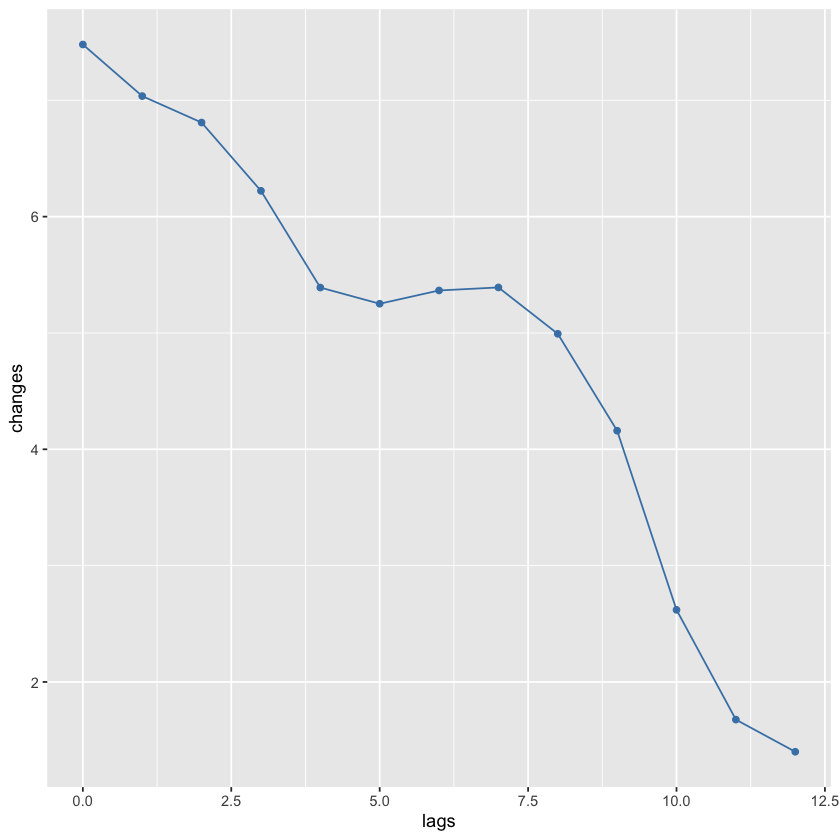

In [41]:
ggplot(data.frame(lags, changes), aes(x = lags, y = changes)) +
    geom_line(color = 'steelblue') +
    geom_point(color = 'steelblue')

That is going in the opposite direction!

In [42]:
lags = rev(lags)

In [43]:
lags

[1] 12 11 10  9  8  7  6  5  4  3  2  1  0

In [44]:
changes = rev(changes)

In [45]:
changes

[1] 1.399770 1.676215 2.619763 4.159695 4.992707 5.391451 5.365475 5.251272
 [9] 5.390349 6.221869 6.809003 7.036403 7.479872

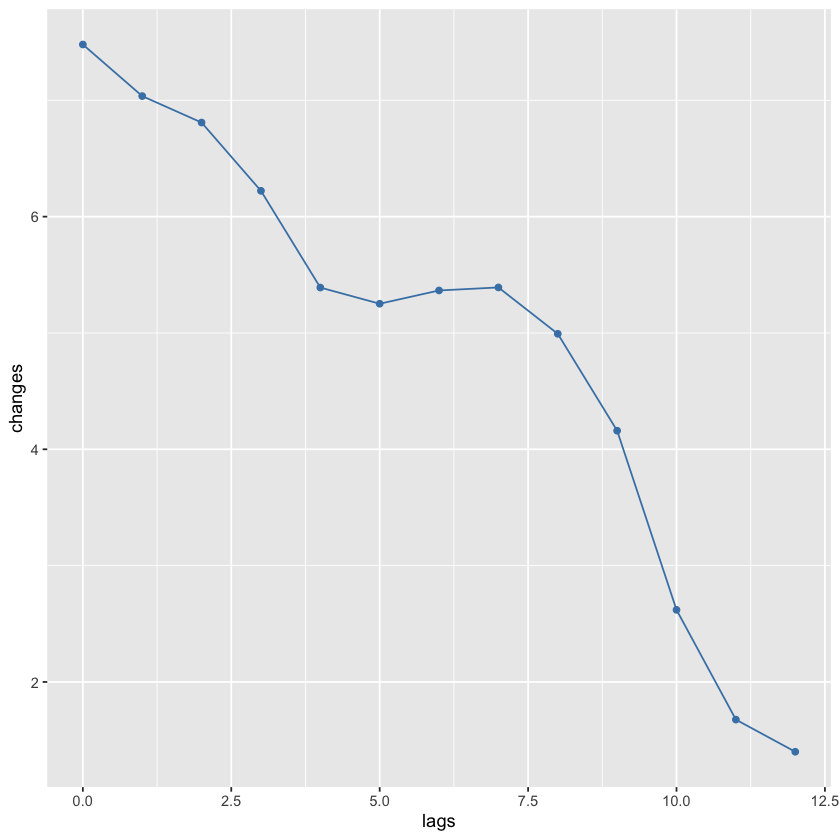

In [46]:
ggplot(data.frame(lags, changes), aes(x = lags, y = changes)) +
    geom_line(color = 'steelblue') +
    geom_point(color = 'steelblue')

WHAT??? How can that be???

Explanation: No matter how we flip/reverse the X variable, ggplot will graph the data using the ordered list. In other words from small to big.

Solution 1: Reverse only the lags.

In [47]:
changes = rev(changes) #back to the original

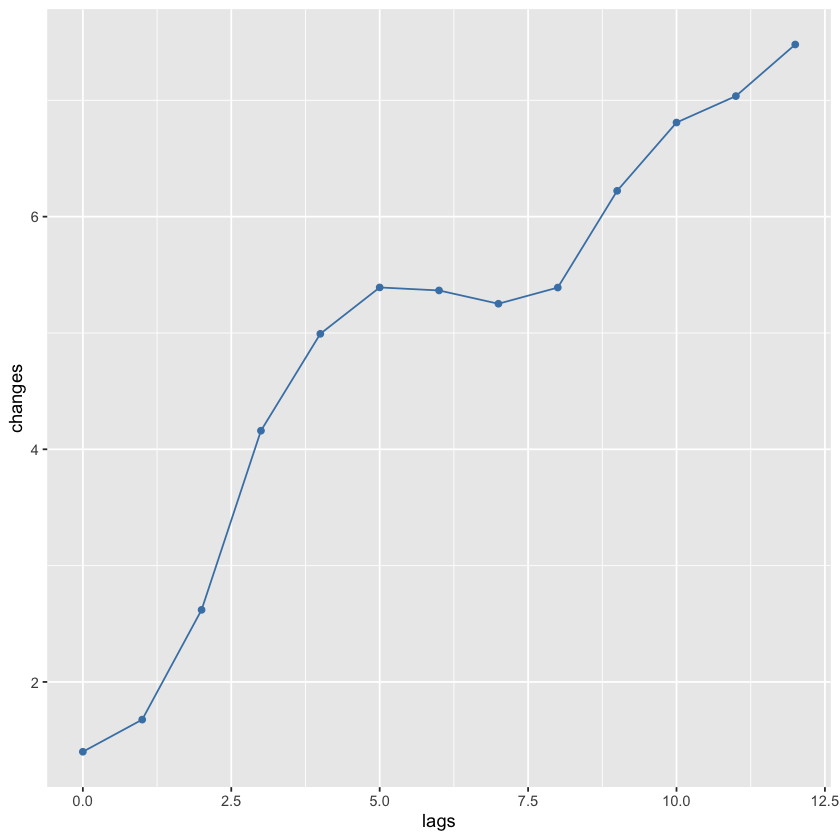

In [48]:
ggplot(data.frame(lags, changes), aes(x = lags, y = changes)) +
    geom_line(color = 'steelblue') +
    geom_point(color = 'steelblue')

Great, but the X-axis labels are wrong! What can be done?

solution: make the X-axis variable (i.e. lags) a list of strings.

In [49]:
# First let's return lags to its original form

lags = rev(lags)

In [50]:
lags

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12

In [51]:
slags = rev(as.character(lags))

In [52]:
slags

[1] "12" "11" "10" "9"  "8"  "7"  "6"  "5"  "4"  "3"  "2"  "1"  "0"

yay!!

In [53]:
changes = rev(changes)

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



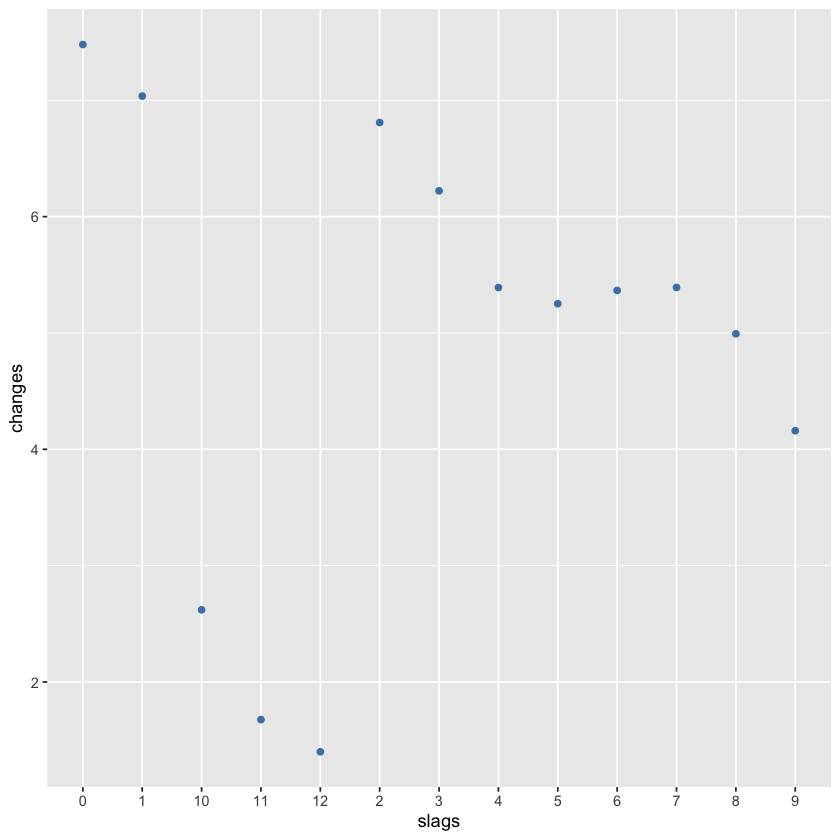

In [54]:
ggplot(data.frame(slags, changes), aes(x = slags, y = changes)) +
    geom_line(color = 'steelblue') +
    geom_point(color = 'steelblue')

Two problems:  
- The data points are not grouped and ```geom_line()``` doesn't know how to connect points. Solution: In this case, it is simple – all points should be connected, so add ```group = 1```. When more variables are used and multiple lines are drawn, the grouping for lines is usually done by variable.
- On the x-axis lags are still ordered alphabetically!

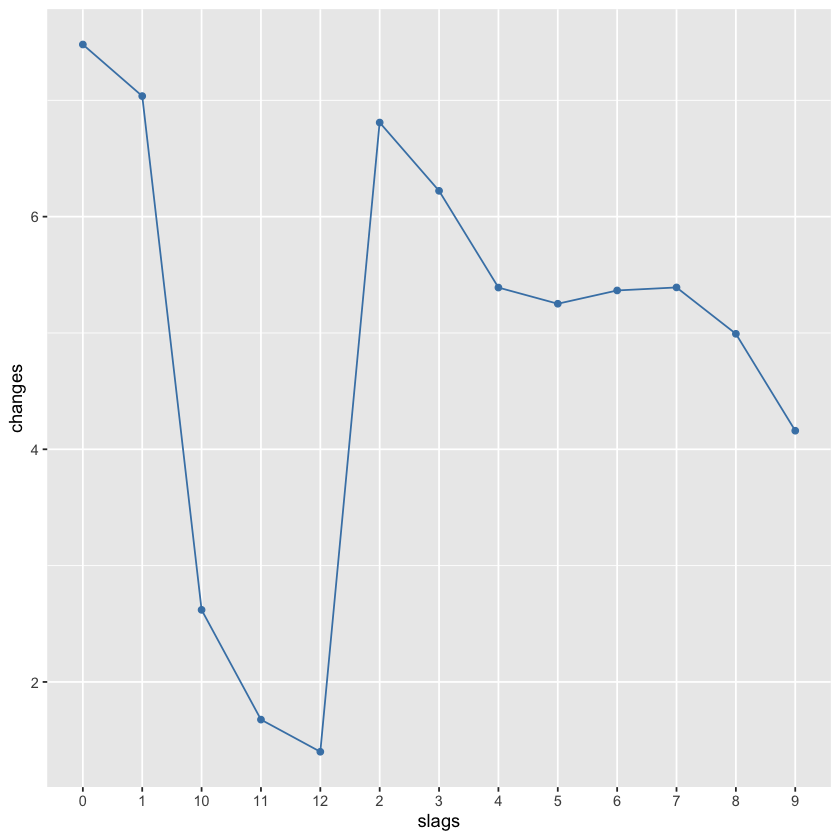

In [55]:
ggplot(data.frame(slags, changes), aes(x = slags, y = changes)) +
    geom_line(color = 'steelblue', group = 1) +
    geom_point(color = 'steelblue')

Now we need to fix the order on the x-axis. One simple way is to transform the variable into a fator. Factor is a data structure used for fields that takes only predefined, finite number of values (categorical data).

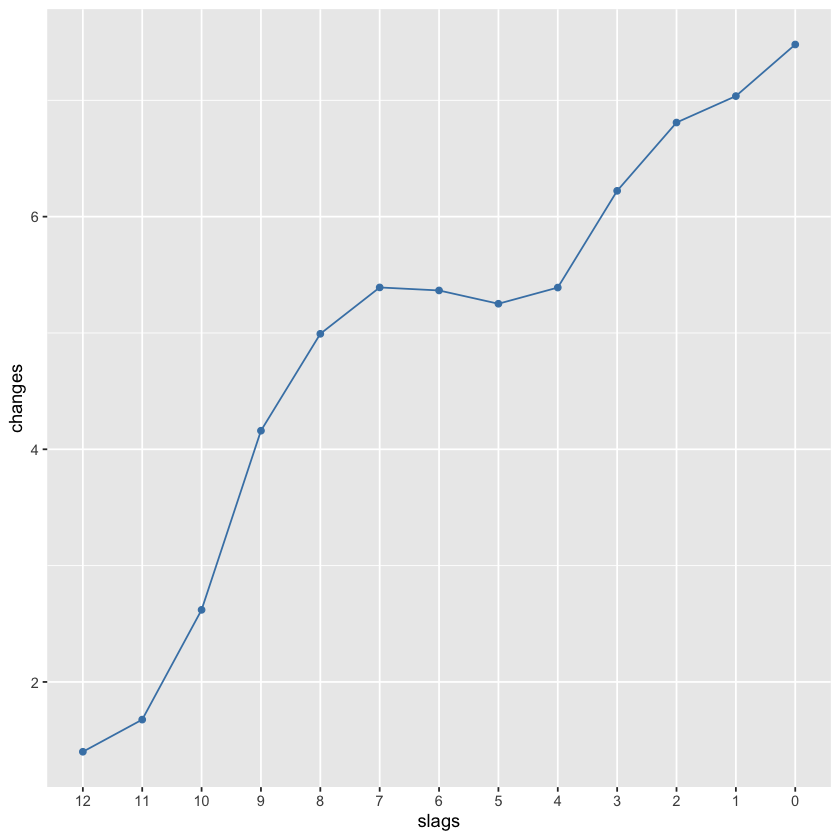

In [56]:
slags = factor(slags, levels = slags) 
#Transform slags as a factor 

ggplot(data.frame(slags, changes), aes(x = slags, y = changes)) +
    geom_line(color = 'steelblue', group = 1) +
    geom_point(color = 'steelblue')

<img src="http://www.clipartbest.com/cliparts/xig/aaz/xigaazLpT.gif" height=300 width=300>

Can we do a bit more to make this graph look nicer? 

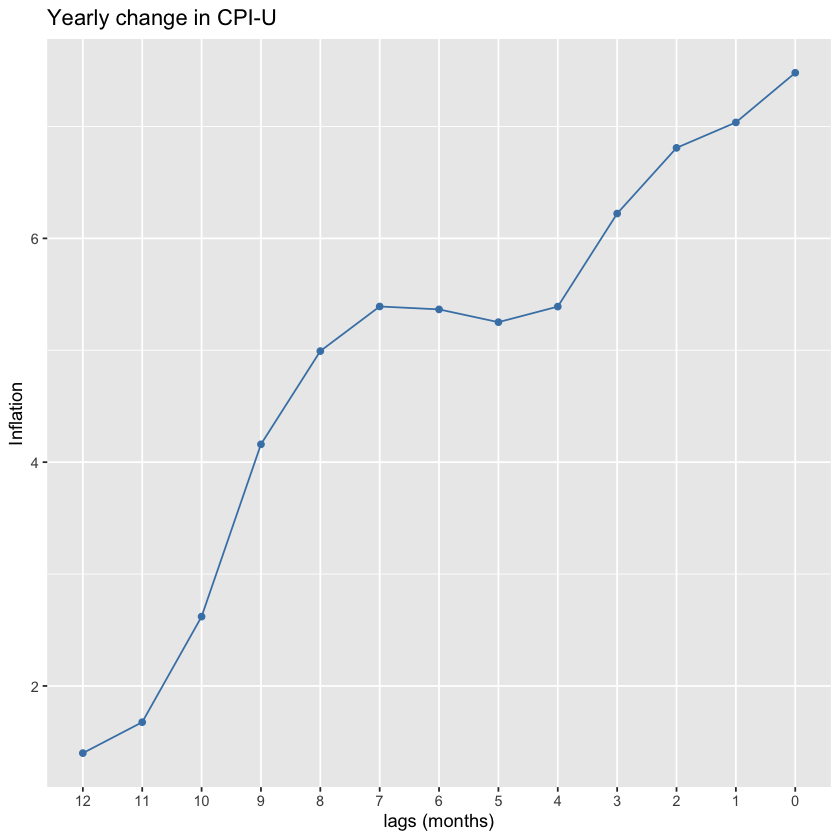

In [57]:
p = ggplot(data.frame(slags, changes), aes(x = slags, y = changes)) +
    geom_line(color = 'steelblue', group = 1) +
    geom_point(color = 'steelblue') +
    labs(title = "Yearly change in CPI-U",
         x = "lags (months)", 
         y = "Inflation")

p

Where can you take it from here?

1. Make the function inflation(lag) accept also the name of the series we want to compute the price change for. In other words, allow the function to accept two inputs: inflation(lag,var_name)
2. Given the above, incorporate the API GET request in the function
3. Check for incorrect input 
4. Deal with the possibility that the reply from the API does not contain any data due to incorrect variable name or finishing the quota
5. Change the lag to month/year label
6. Have the function accept location code too

In [58]:
# library(httr)
# library(jsonlite)

inflation2 = function(lag, varname = 'CUUR0000SA0'){
    
    # This function computes the percent change in the level of prices (inflation) for the 
    # 12 months starting '12+lag' months ago and ending 'lag' months ago.
    
    # lag - an integer indicating the lag in months
    # varname - a string containing the variable name (CUUR0000SA0 is the default)
    
    # Step 0: Check inputs
    if(lag%%1 !=0){ # there's no handy function in R to check if a number is an integer but we can check the fractional part
        return('lag should be an integer')
        }
    if(lag>12 || lag<0){
        # To join two or more conditions into a single if statement, use logical operators  
        # && (and), || (or) and ! (not).
        return('lag should be an integer between 0 and 12, including.')
    }    
    if(typeof(varname) != 'character'){
        return('variable name should be a string (or left out)')
    }
    
    # Step 1: API call
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
    url = paste0(base_url, varname)
    r = fromJSON(rawToChar(GET(url)$content))
    
    # Step 2: Check whether the GET request was successful
    if(r$status != 'REQUEST_SUCCEEDED'){
        return(r$message)
    }
    
    # Step 3: Compute inflation
    new = as.numeric(r$Results$series[1,]$data[[1]][1+lag,]$value) 
    old = as.numeric(r$Results$series[1,]$data[[1]][13+lag,]$value) 
    
    change = (new/old - 1)*100
    print(paste0('Inflation in the period starting ', lag, ' months ago and ending ', 12+lag, ' months ago was ',round(change,1),'%'))
    return(change)
}

In [59]:
round(inflation2(0),1)

[1] "Inflation in the period starting 0 months ago and ending 12 months ago was 7.5%"


[1] 7.5

To be continued...